In [13]:
import requests
import urllib.parse
import pandas as pd
import matplotlib as plt
from sklearn import preprocessing

In [2]:
def create_playlist(name,public):
    response = requests.post(
        SPOTIFY_CREATE_PLAYLIST_URL,
        headers = {
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        },
        json = {
            "name": name,
            "public": public
        }
    )
    json_resp = response.json()
    
    return json_resp

In [3]:
def get_playlist():
    SPOTIFY_GET_PLAYLIST_URL = "https://api.spotify.com/v1/playlists/37i9dQZF1EMbaHuRPs7mTk" 
    ACCESS_TOKEN = "BQBgpVB_O2EfwpOF9pJFU0JRiTRnpsPRyHTFNm_k2nxblY0VQWXXYaI-MiRfAkOoBgCO5o6XJD2ik8hmI28kx6sW0-iIyhtGLLrtcN7uKYCZFtEEahBVdRgg-EepXUGSeJ-TPbng9kwper5J_uqvXiD9GWeqJoPcslwro3kJ4NIHQev9Yzalf-M8wTNUl4LSwdFYiXtCTl-X_SfZcwgITR-A7MCbnDSSjC3PCgcE7h0rqIJqgIRRYSrv"
    response = requests.get(
        SPOTIFY_GET_PLAYLIST_URL,
        headers = {
            "Accept": "application/json",
            "Content-Type": "application/json",
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        }        
    )
    json_resp = response.json()
    
    return json_resp

In [4]:
def get_playlist_list():
    SPOTIFY_GET_PLAYLIST_URL = "https://api.spotify.com/v1/me/playlists" 
    ACCESS_TOKEN = "BQBgpVB_O2EfwpOF9pJFU0JRiTRnpsPRyHTFNm_k2nxblY0VQWXXYaI-MiRfAkOoBgCO5o6XJD2ik8hmI28kx6sW0-iIyhtGLLrtcN7uKYCZFtEEahBVdRgg-EepXUGSeJ-TPbng9kwper5J_uqvXiD9GWeqJoPcslwro3kJ4NIHQev9Yzalf-M8wTNUl4LSwdFYiXtCTl-X_SfZcwgITR-A7MCbnDSSjC3PCgcE7h0rqIJqgIRRYSrv"
    response = requests.get(
        SPOTIFY_GET_PLAYLIST_URL,
        headers = {
            "Accept": "application/json",
            "Content-Type": "application/json",
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        }        
    )
    json_resp = response.json()
    
    return json_resp

In [5]:
playlist = create_playlist(
        name = "My Suggestions List",
        public = False
    )
print(f"Playlist: {playlist}")

NameError: name 'SPOTIFY_CREATE_PLAYLIST_URL' is not defined

In [ ]:
lists = get_playlist_list()
print(f"Playlist: {lists}")

In [ ]:
for i in range(0,len(lists)):
    print(lists["items"][i]["name"])

In [ ]:
print(lists["items"][3]["name"])

In [ ]:
print(lists["items"][3]["id"])

In [ ]:
songs_list = get_playlist()
print(f"Playlist: {songs_list}")

In [ ]:
song_list_df = pd.DataFrame(columns = [["Artist","Artist_ID","Track","Track_ID"]])
list_art = []
list_art_id = []
list_name = []
list_id = []
for i in range(0,100):
    list_art.append(songs_list["tracks"]["items"][i]["track"]["artists"][0]["name"])
    list_art_id.append(songs_list["tracks"]["items"][i]["track"]["artists"][0]["id"])
    list_name.append(songs_list["tracks"]["items"][i]["track"]["name"])
    list_id.append(songs_list["tracks"]["items"][i]["track"]["id"])

In [ ]:
song_list_df["Artist"] = list_art
song_list_df["Artist_ID"] = list_art_id
song_list_df["Track"] = list_name
song_list_df["Track_ID"] = list_id

In [ ]:
song_list_df.head()

In [ ]:
def get_audio_feat(track_id):
    SPOTIFY_GET_FEATURES_URL = "https://api.spotify.com/v1/audio-features/"+track_id 
    ACCESS_TOKEN = "BQCjYMSlu10WlZd402Q1yXPaeJEYoz1ZbFaHvciUXDL096ulOU363v_jCJq5c5YCSg_JQ9wLHMCOGFJeMfskTklJCRRcNjQqgGi0mfiKtpxnXTcwGdavuz5Khh9W8H74prYpjEzFSYs1aoF-tiwzqE21EVsRIC_lLZelHAW8aKf6lYmZpfeq2krDM5kthxSCl0e9yDVxLhpnBuWu8bOWlXn33ixduwQ0_aZ23Ets2U8BhI5pajXjvShH"
    response = requests.get(
        SPOTIFY_GET_FEATURES_URL,
        headers = {
            "Accept": "application/json",
            "Content-Type": "application/json",
            "Authorization": f"Bearer {ACCESS_TOKEN}"
        }        
    )
    json_resp = response.json()
    
    return json_resp

In [ ]:
feat = get_audio_feat("1OtGo99uypkRbMqshBVFnn")
print(f"Features: {feat}")

In [ ]:
feat["danceability"]

In [ ]:
list_dance = []
list_energy = []
list_loud = []
list_speech = []
list_acoustic = []
list_instru = []
list_live = []
list_valence = []
list_tempo = []
for i in range(0,100):
    feat = get_audio_feat(str(song_list_df.loc[i]["Track_ID"]))
    list_dance.append(feat["danceability"])
    list_energy.append(feat["energy"])
    list_loud.append(feat["loudness"])
    list_speech.append(feat["speechiness"])
    list_acoustic.append(feat["acousticness"])
    list_instru.append(feat["instrumentalness"])
    list_live.append(feat["liveness"])
    list_valence.append(feat["valence"])
    list_tempo.append(feat["tempo"])
    

In [ ]:
song_list_df["Danceability"] = list_dance
song_list_df["Energy"] = list_energy
song_list_df["Loudness"] = list_loud
song_list_df["Speechiness"] = list_speech
song_list_df["Acousticness"] = list_dance
song_list_df["Instrumentalness"] = list_energy
song_list_df["Liveness"] = list_loud
song_list_df["Valence"] = list_speech
song_list_df["Tempo"] = list_speech

In [ ]:
song_list_df.head()

In [ ]:
song_list_df.to_csv(r"2020_top_songs.csv")

In [20]:
song_list_df = pd.read_csv("2020_top_songs.csv")
song_list_df = song_list_df.drop("Unnamed: 0",axis=1)
song_list_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.528970,0.683320,-6.581230,0.057978,0.528970,0.683320,-6.581230,0.057978,0.057978
std,0.155498,0.194017,2.777296,0.046279,0.155498,0.194017,2.777296,0.046279,0.046279
min,0.160000,0.163000,-16.565000,0.023200,0.160000,0.163000,-16.565000,0.023200,0.023200
25%,0.446750,0.547000,-7.643250,0.033100,0.446750,0.547000,-7.643250,0.033100,0.033100
50%,0.526500,0.724000,-5.835000,0.041900,0.526500,0.724000,-5.835000,0.041900,0.041900
75%,0.637500,0.833500,-4.792750,0.058900,0.637500,0.833500,-4.792750,0.058900,0.058900
max,0.949000,0.982000,-2.337000,0.277000,0.949000,0.982000,-2.337000,0.277000,0.277000


In [ ]:
song_list_df.isnull().sum()

In [ ]:
song_list_df.mean().plot(kind="bar")

In [ ]:
song_list_df.mean()

In [ ]:
song_list_df["Danceability"].plot.hist()

In [ ]:
song_list_df["Energy"].plot.hist()

In [ ]:
song_list_df["Loudness"].plot.hist()

In [ ]:
song_list_df["Speechiness"].plot.hist()

In [ ]:
song_list_df["Acousticness"].plot.hist()

In [ ]:
song_list_df["Instrumentalness"].plot.hist()

In [ ]:
song_list_df["Liveness"].plot.hist()

In [ ]:
song_list_df["Valence"].plot.hist()

In [ ]:
song_list_df["Tempo"].plot.hist()

<AxesSubplot:>

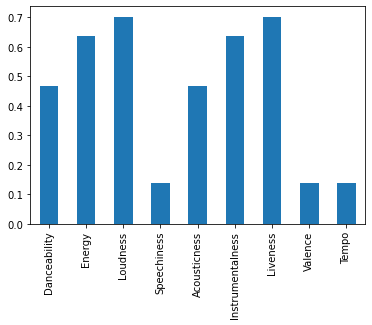

In [21]:
mm_scaler = preprocessing.MinMaxScaler()
mm_song_list_df = song_list_df[["Danceability","Energy","Loudness","Speechiness","Acousticness",
                                                       "Instrumentalness","Liveness","Valence","Tempo"]]
mm_song_list_df = mm_scaler.fit_transform(mm_song_list_df)
mm_song_list_df = pd.DataFrame(mm_song_list_df, columns=["Danceability","Energy","Loudness","Speechiness","Acousticness",
                                                       "Instrumentalness","Liveness","Valence","Tempo"])
mm_song_list_df.mean().plot.bar()

In [8]:
tracks_df = pd.read_csv("tracks.csv")
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [7]:
tracks_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
tracks_df = tracks_df.drop(["duration_ms","explicit","release_date","time_signature"],axis=1)
tracks_df.head()

,id,name,popularity,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,6,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [10]:
tracks_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,18.370642,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000
50%,27.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000
75%,41.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000
max,100.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


<AxesSubplot:ylabel='Frequency'>

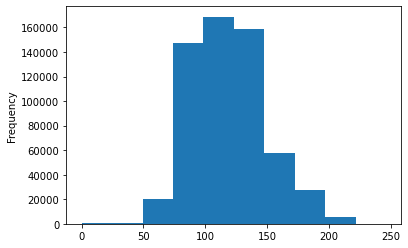

In [11]:
tracks_df["tempo"].plot.hist()

In [16]:
mm_scaler = preprocessing.MinMaxScaler()
mm_tracks_df = tracks_df[["danceability","energy","loudness","speechiness","acousticness",
                                                       "instrumentalness","liveness","valence","tempo"]]
mm_tracks_df = mm_scaler.fit_transform(mm_tracks_df)
mm_tracks_df = pd.DataFrame(mm_tracks_df, columns=["danceability","energy","loudness","speechiness","acousticness",
                                                       "instrumentalness","liveness","valence","tempo"])

In [17]:
mm_tracks_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,0.568712,0.542036,0.761655,0.107995,0.451669,0.113451,0.213935,0.552292,0.480820
std,0.167611,0.251923,0.077847,0.185265,0.350238,0.266868,0.184326,0.257671,0.120805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.457114,0.343000,0.720586,0.035015,0.097289,0.000000,0.098300,0.346000,0.388017
50%,0.582240,0.549000,0.776386,0.045623,0.423695,0.000024,0.139000,0.564000,0.476433
75%,0.692230,0.748000,0.818618,0.078579,0.788153,0.009550,0.278000,0.769000,0.553293
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

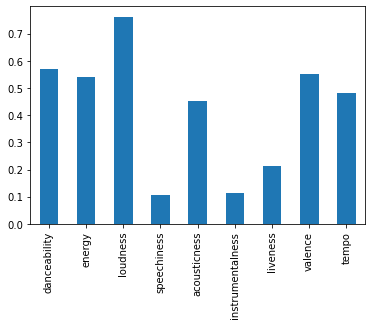

In [19]:
mm_tracks_df.mean().plot(kind="bar")

<AxesSubplot:>

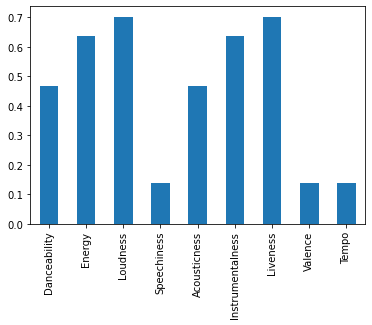

In [22]:
mm_song_list_df.mean().plot.bar()